# Lab 4

## import libs and connect to database 

In [2]:
import pandas 
import configparser
import psycopg2

In [34]:
config= configparser.ConfigParser()
config.read('config.ini')

host= config['myaws']['host']
db= config['myaws']['db']
user= config ['myaws']['user']
pwd= config ['myaws']['pwd']

conn= psycopg2.connect (host=host, user=user, password=pwd, dbname=db)

cur= conn.cursor()

## q1

In [4]:
sql_q1= """
        select * from gp14.student
        """

In [6]:
df = pandas.read_sql_query(sql_q1, conn)
df[:]

,student_email,s_name,major
0,ab@jmu.edu,AB,IA
1,bc@jmu.edu,BC,IA
2,cd@jmu.edu,CD,IA
3,de@jmu.edu,DE,IA
4,ef@jmu.edu,EF,IA
5,fg@jmu.edu,FG,IA
6,gh@jmu.edu,GH,IA
7,hi@jmu.edu,HI,IA
8,ij@jmu.edu,IJ,IA
9,jk@jmu.edu,JK,IA


## q2

In [7]:
sql_q2= """
        select gp14.professor.professor_name,
        gp14.course.c_name
        from gp14.professor
        inner join gp14.course
        on gp14.professor.p_email = gp14.course.p_email
        """

In [8]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,professor_name,c_name
0,new_p,new_c_name
1,Hendrickson,CfactReason
2,Marrin,Capstone
3,Walton,Intro to NatSec
4,Moore,IntelWriting


## q3

In [9]:
sql_q3= """
        select course_number, 
        count(course_number) as enrolled
        from gp14.enroll_list
        group by course_number
        order by enrolled desc
        """

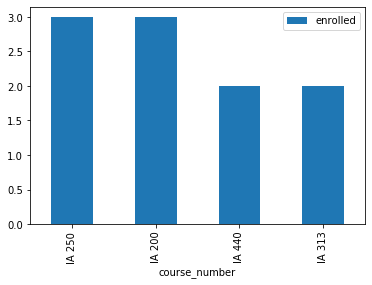

In [10]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='course_number')

In [13]:
sql_q4 = """
        select gp14.professor.professor_name,
        count(gp14.course.c_name) as teaching_number
        from gp14.professor
        inner join gp14.course
        on gp14.professor.p_email = gp14.course.p_email
        group by professor.professor_name
        order by teaching_number desc
        """

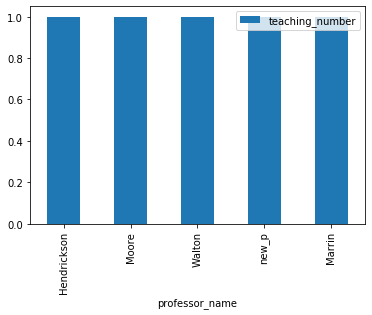

In [14]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='professor_name')

## q5

In [21]:
sql_q5_professor = """
                    insert into gp14.professor(p_email,professor_name,office)
                    values('{}','{}','{}')
                    """.format('new_pr@jmu.edu','new_p','new_officenum')

In [27]:
cur.execute(sql_q5_professor)

In [28]:
conn.commit()

In [29]:
df=pandas.read_sql_query('select * from gp14.professor',conn)
df[:]

,p_email,professor_name,office
0,moore8ka@jmu.edu,Moore,ISAT 116
1,marrinsp@jmu.edu,Marrin,Engeo 2104
2,waltontr@jmu.edu,Walton,ISAT 326
3,new_p@jmu.edu,new_p,new_office
4,hendrinx@jmu.edu,Hendrickson,online
5,new_pr@jmu.edu,new_p,new_officenum


In [32]:
sql_q5_course = """
                    insert into gp14.course(course_number,c_name,room_number,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_newp','new_c_name','online','new_p@jmu.edu')

In [35]:
cur.execute(sql_q5_course)

In [36]:
conn.commit()

In [38]:
df=pandas.read_sql_query('select * from gp14.course',conn)
df[:]

,course_number,c_name,room_number,p_email
0,ia_new,new_c_name,online,new_p@jmu.edu
1,IA 313,CfactReason,online,hendrinx@jmu.edu
2,IA 440,Capstone,online,marrinsp@jmu.edu
3,IA 200,Intro to NatSec,online,waltontr@jmu.edu
4,IA 250,IntelWriting,online,moore8ka@jmu.edu
5,ia_newp,new_c_name,online,new_p@jmu.edu


## q6

In [39]:
sql_q6_course = """
                update gp14.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [40]:
cur.execute(sql_q6_course)

In [41]:
conn.commit()

In [42]:
df=pandas.read_sql_query('select * from gp14.course',conn)
df[:]

,course_number,c_name,room_number,p_email
0,ia_new,new_c_name,online,new_p@jmu.edu
1,IA 313,CfactReason,online,hendrinx@jmu.edu
2,IA 440,Capstone,online,marrinsp@jmu.edu
3,IA 200,Intro to NatSec,online,waltontr@jmu.edu
4,IA 250,IntelWriting,online,moore8ka@jmu.edu
5,ia_newp,new_c_name,online,new_p@jmu.edu


In [43]:
sql_q6_professor = """
                delete from gp14.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [44]:
cur.execute(sql_q6_professor)

In [45]:
conn.commit()

In [46]:
df=pandas.read_sql_query('select * from gp14.professor',conn)
df[:]

,p_email,professor_name,office
0,moore8ka@jmu.edu,Moore,ISAT 116
1,marrinsp@jmu.edu,Marrin,Engeo 2104
2,waltontr@jmu.edu,Walton,ISAT 326
3,new_p@jmu.edu,new_p,new_office
4,hendrinx@jmu.edu,Hendrickson,online
5,new_pr@jmu.edu,new_p,new_officenum


## close connection 

In [47]:
cur.close()
conn.close()